# Example to use the Gamma-py plugin with the JeSeT interface

In this tutorial we show how to import a jetset model into Gamma-py, and finally we perform a model fitting with Gamma-py. To run this plugin you have to install Gamma-py
https://docs.gammapy.org/0.19/getting-started/install.html

In [35]:
import astropy.units as u
import  numpy as np

from jetset.gammapy_plugin import GammapyJetsetModelFactory
from jetset.jet_model import Jet
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs
from gammapy.modeling.models import SPECTRAL_MODEL_REGISTRY

## Importing a jetset model into gammapy

In [36]:
jet=Jet()

In [37]:
jet.parameters

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_cut,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


None

In [38]:
gammapy_jet_model=GammapyJetsetModelFactory(jet)
gammapy_jet_model.parameters.to_table()

type,name,value,unit,error,min,max,frozen,link
str8,str9,float64,str4,int64,float64,float64,bool,str1
spectral,gmin,2.0000e+00,,0.000e+00,1.000e+00,1.000e+09,False,
spectral,gmax,1.0000e+06,,0.000e+00,1.000e+00,1.000e+15,False,
spectral,N,1.0000e+02,cm-3,0.000e+00,0.000e+00,nan,False,
spectral,gamma_cut,1.0000e+04,,0.000e+00,1.000e+00,1.000e+09,False,
spectral,R,5.0000e+15,cm,0.000e+00,1.000e+03,1.000e+30,False,
spectral,R_H,1.0000e+17,cm,0.000e+00,0.000e+00,nan,True,
spectral,B,1.0000e-01,G,0.000e+00,0.000e+00,nan,False,
spectral,beam_obj,1.0000e+01,,0.000e+00,1.000e-04,nan,False,
spectral,z_cosm,1.0000e-01,,0.000e+00,0.000e+00,nan,False,


In [5]:
print(gammapy_jet_model)

GammapyJetsetModel

  type      name     value    unit   error      min       max    frozen link
-------- --------- ---------- ---- --------- --------- --------- ------ ----
spectral      gmin 2.0000e+00      0.000e+00 1.000e+00 1.000e+09  False     
spectral      gmax 1.0000e+06      0.000e+00 1.000e+00 1.000e+15  False     
spectral         N 1.0000e+02 cm-3 0.000e+00 0.000e+00       nan  False     
spectral gamma_cut 1.0000e+04      0.000e+00 1.000e+00 1.000e+09  False     
spectral         R 5.0000e+15   cm 0.000e+00 1.000e+03 1.000e+30  False     
spectral       R_H 1.0000e+17   cm 0.000e+00 0.000e+00       nan   True     
spectral         B 1.0000e-01    G 0.000e+00 0.000e+00       nan  False     
spectral  beam_obj 1.0000e+01      0.000e+00 1.000e-04       nan  False     
spectral    z_cosm 1.0000e-01      0.000e+00 0.000e+00       nan  False     


let's verify that parameters are updated

In [6]:
gammapy_jet_model.R.value=1E15
gammapy_jet_model.N.value=1E4

gammapy_jet_model.p.value=1.5


In [7]:
gammapy_jet_model.parameters.to_table()

type,name,value,unit,error,min,max,frozen,link
str8,str9,float64,str4,int64,float64,float64,bool,str1
spectral,gmin,2.0000e+00,,0.000e+00,1.000e+00,1.000e+09,False,
spectral,gmax,1.0000e+06,,0.000e+00,1.000e+00,1.000e+15,False,
spectral,N,1.0000e+04,cm-3,0.000e+00,0.000e+00,nan,False,
spectral,gamma_cut,1.0000e+04,,0.000e+00,1.000e+00,1.000e+09,False,
spectral,R,1.0000e+15,cm,0.000e+00,1.000e+03,1.000e+30,False,
spectral,R_H,1.0000e+17,cm,0.000e+00,0.000e+00,nan,True,
spectral,B,1.0000e-01,G,0.000e+00,0.000e+00,nan,False,
spectral,beam_obj,1.0000e+01,,0.000e+00,1.000e-04,nan,False,
spectral,z_cosm,1.0000e-01,,0.000e+00,0.000e+00,nan,False,


### plotting with gammapy

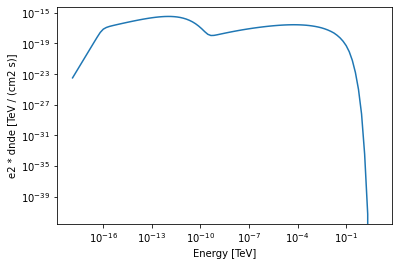

In [8]:
p=gammapy_jet_model.plot(energy_bounds=[1E-18, 10] * u.TeV,energy_power=2)

### plotting with jetset

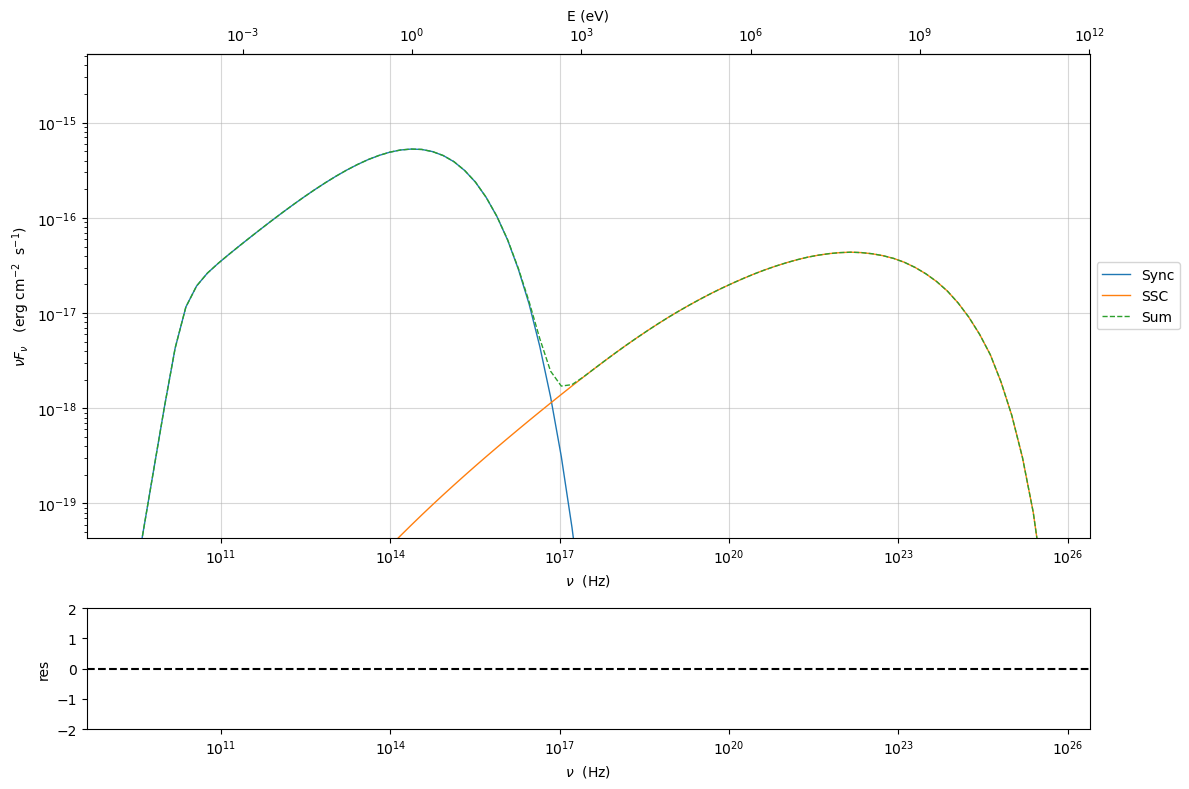

In [9]:
gammapy_jet_model.jetset_model.plot_model()

## Model fitting with gammapy


***  binning data  ***
---> N bins= 179
---> bin_widht= 0.1



/Users/orion/anaconda3/envs/gammapy/lib/python3.9/site-packages/astropy/table/table.py:1407: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  newcol = col[slice_]


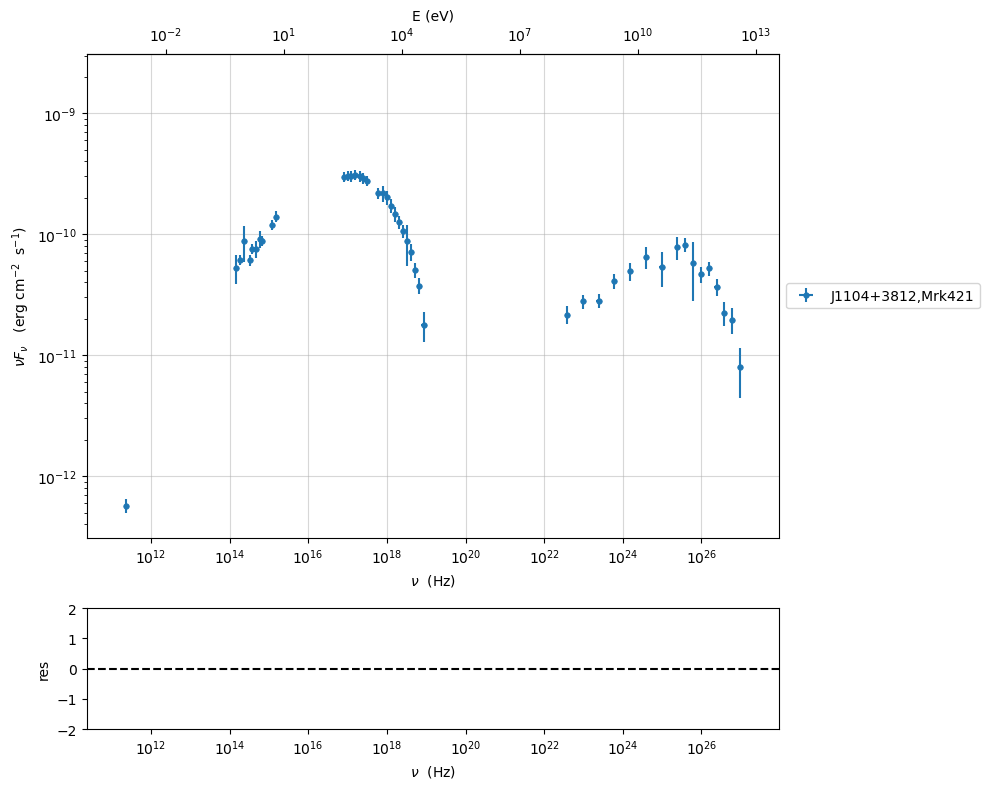

In [10]:
%matplotlib inline
data=Data.from_file(test_SEDs[1])
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.1)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed()


*** evaluating spectral indices for data ***



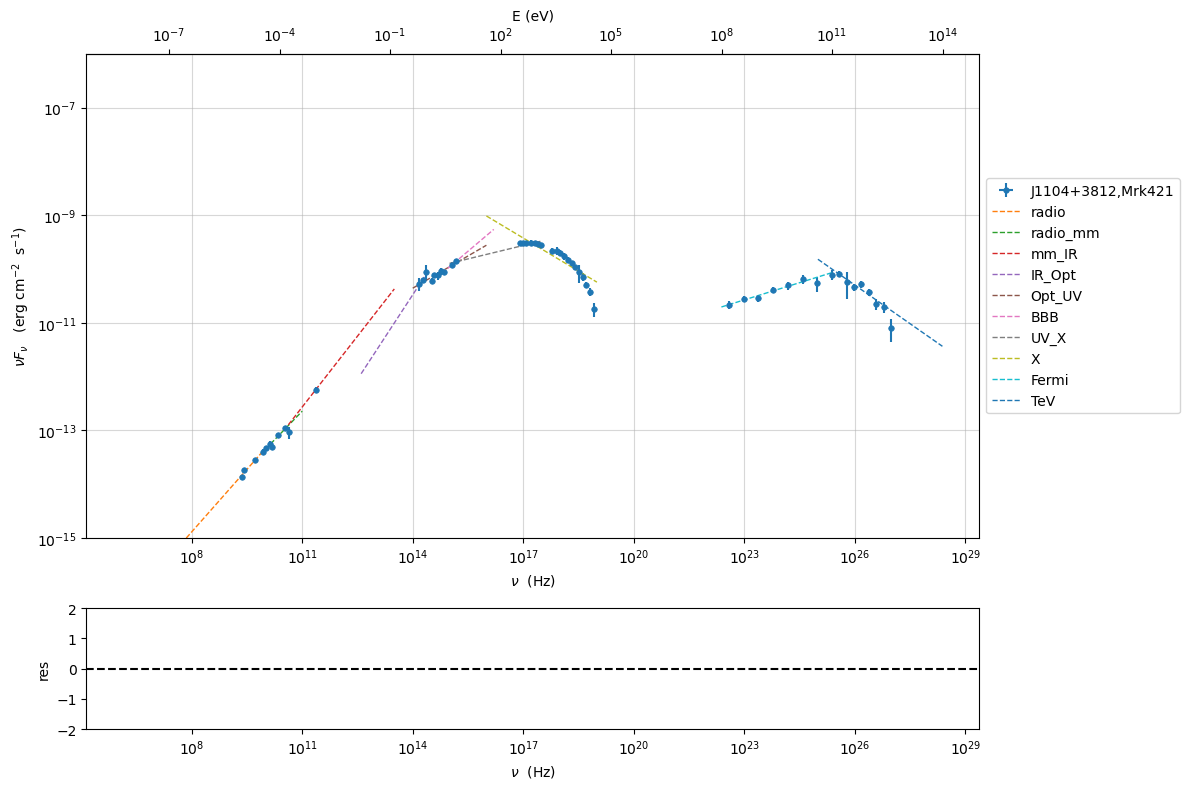

In [12]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(minimizer='lsb',silent=True)
p=my_shape.plot_indices()
p.setlim(y_min=1E-15,y_max=1E-6)

In [13]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=False,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10.,21.])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10.0, 21.0]
---> class:  HSP





model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.624004e-01,-1.624004e-01,6.476287e-03,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-1.152224e-02,-1.152224e-02,9.546081e-04,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,1.673089e+01,1.673089e+01,2.573962e-02,--,1.668212e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-9.484256e+00,-9.484256e+00,1.783365e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


---> sync       nu_p=+1.673089e+01 (err=+2.573962e-02)  nuFnu_p=-9.484256e+00 (err=+1.783365e-02) curv.=-1.624004e-01 (err=+6.476287e-03)




*** Log-Polynomial fitting of the IC component ***
---> fit range: [23.0, 29.0]
---> LogCubic fit




model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-2.104700e-01,-2.104700e-01,3.125009e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-4.685169e-02,-4.685169e-02,2.175617e-02,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.525001e+01,2.525001e+01,1.144759e-01,--,2.529805e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.010998e+01,-1.010998e+01,3.513736e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


---> IC         nu_p=+2.525001e+01 (err=+1.144759e-01)  nuFnu_p=-1.010998e+01 (err=+3.513736e-02) curv.=-2.104700e-01 (err=+3.125009e-02)



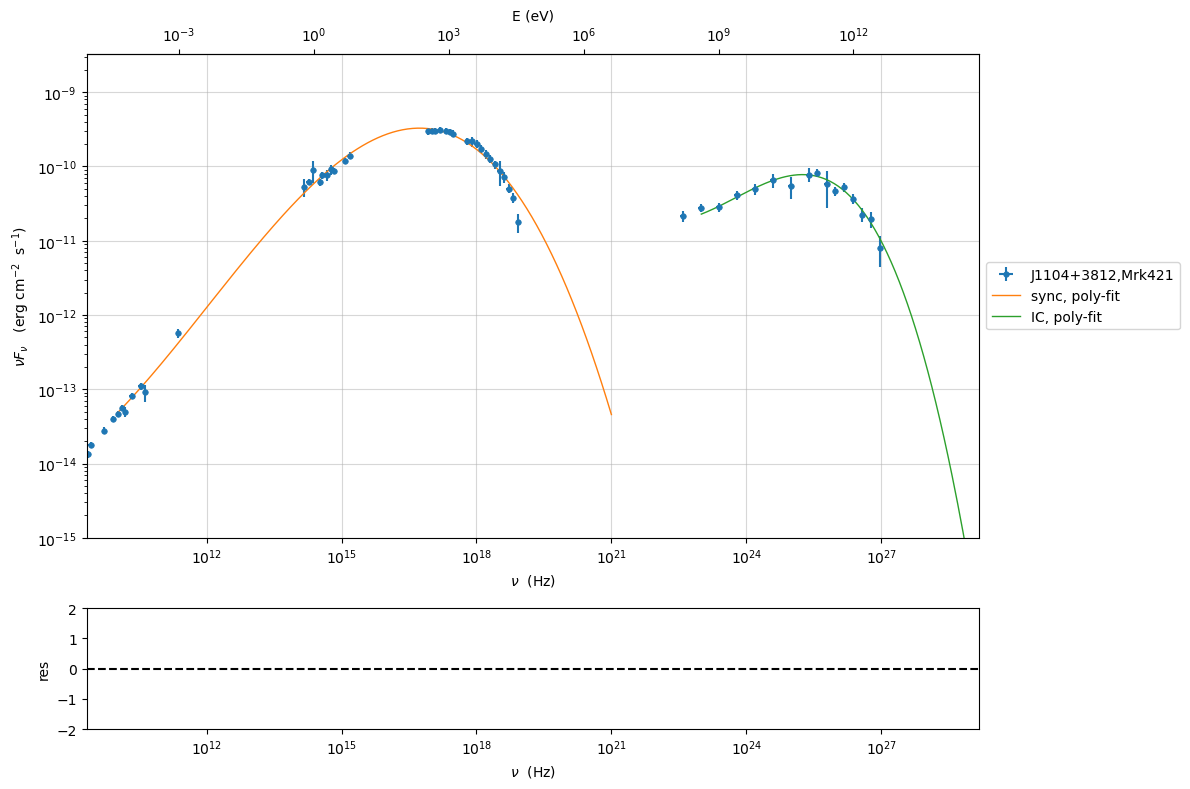

In [15]:
my_shape.IC_fit(fit_range=[23.,29.],minimizer='minuit',silent=True)
p=my_shape.plot_shape_fit()
p.setlim(y_min=1E-15)

In [16]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E12,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False,silent=True)
prefit_jet.save_model('prefit_jet.pkl')


***  constrains parameters from observable ***



/Users/orion/anaconda3/envs/gammapy/lib/python3.9/site-packages/jetset/obs_constrain.py:650: RankWarning: Polyfit may be poorly conditioned
  return func(*args, **kwargs),completed


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,3.105858e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,5.050000e-02,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,2.500000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,3.080000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,4.697542e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.373160e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,8.476131e-01,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,3.327955e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,2.163414e+00,-1.000000e+01,1.000000e+01,False,False


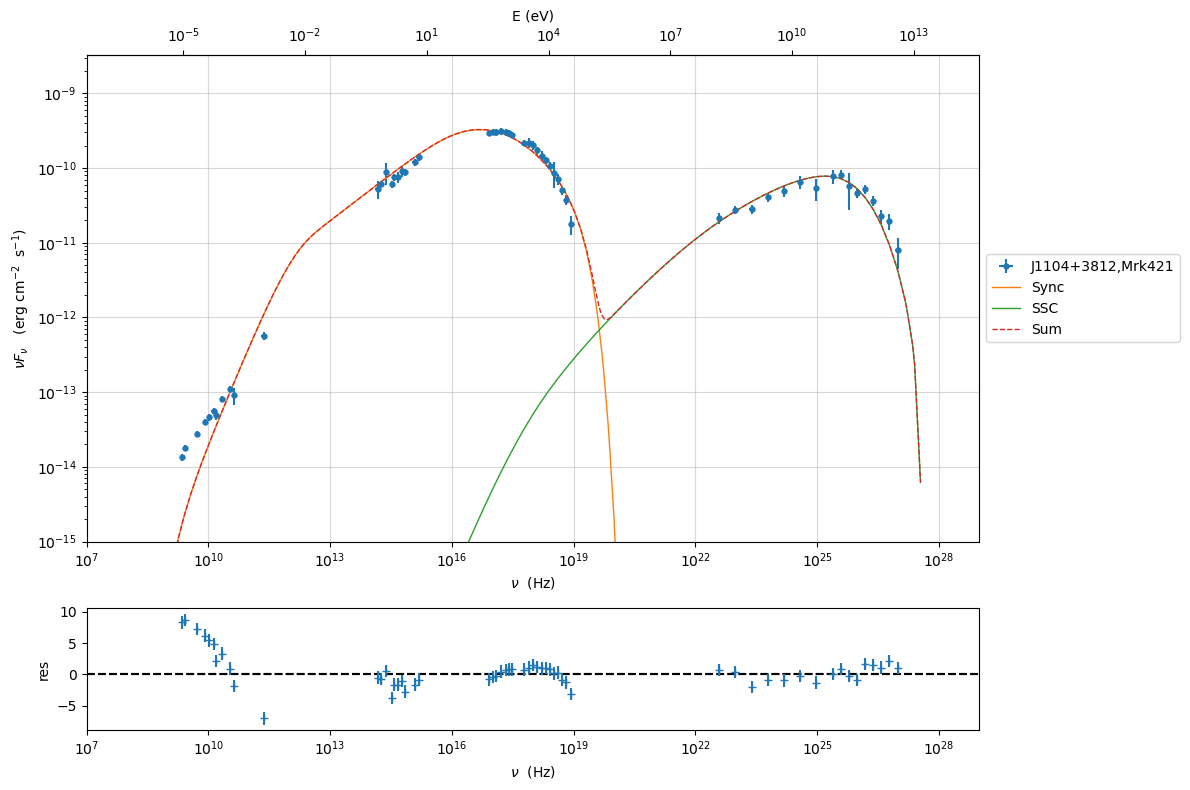

In [17]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_model_residual_plot(prefit_jet,sed_data)
pl.setlim(y_min=1E-15,x_min=1E7,x_max=1E29)

### setting gammapy jetset model

we import the model to gammapy and we set min/max values. Notice that gammapy has not fit_range, but uses only min/max

In [18]:


jet=Jet.load_model('prefit_jet.pkl')
jet.parameters.z_cosm.freeze()
jet.parameters.gmin.freeze()
jet.parameters.R.freeze()
jet.parameters.gmax.set(val_min=1E5, val_max=1E7)
jet.parameters.N.set(val_min=0.001, val_max=3)
jet.parameters.R.set(val_min=1E15,val_max=1E17)
jet.parameters.B.set(val_min=0.0001,val_max=1)
jet.parameters.beam_obj.set(val_min=5,val_max=30)
jet.parameters.gamma0_log_parab.set(val_min=1E3,val_max=1E5)
jet.parameters.s.set(val_min=1,val_max=3)

jet.parameters.r.set(val_min=0.1,val_max=2)
jet.parameters.R_H.set(val_min=1E17,val_max=1E19)
jet.parameters.z_cosm.set(val_min=0.0,val_max=1)

gammapy_jet_model=GammapyJetsetModelFactory(jet)
SPECTRAL_MODEL_REGISTRY.append(gammapy_jet_model)


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,4.697542e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.373160e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,8.476131e-01,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,3.327955e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,2.163414e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,r,spectral_curvature,,8.120021e-01,-1.500000e+01,1.500000e+01,False,False
jet_leptonic,R,region_size,cm,3.105858e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,5.050000e-02,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,2.500000e+01,1.000000e-04,--,False,False


In [19]:
gammapy_jet_model.parameters.to_table()


type,name,value,unit,error,min,max,frozen,link
str8,str16,float64,str4,int64,float64,float64,bool,str1
spectral,gmin,4.6975e+02,,0.000e+00,1.000e+00,1.000e+09,True,
spectral,gmax,1.3732e+06,,0.000e+00,1.000e+05,1.000e+07,False,
spectral,N,8.4761e-01,cm-3,0.000e+00,1.000e-03,3.000e+00,False,
spectral,gamma0_log_parab,3.3280e+04,,0.000e+00,1.000e+03,1.000e+05,False,
spectral,s,2.1634e+00,,0.000e+00,1.000e+00,3.000e+00,False,
spectral,r,8.1200e-01,,0.000e+00,1.000e-01,2.000e+00,False,
spectral,R,3.1059e+16,cm,0.000e+00,1.000e+15,1.000e+17,True,
spectral,R_H,1.0000e+17,cm,0.000e+00,1.000e+17,1.000e+19,True,
spectral,B,5.0500e-02,G,0.000e+00,1.000e-04,1.000e+00,False,


In [20]:
_=gammapy_jet_model.evaluate()


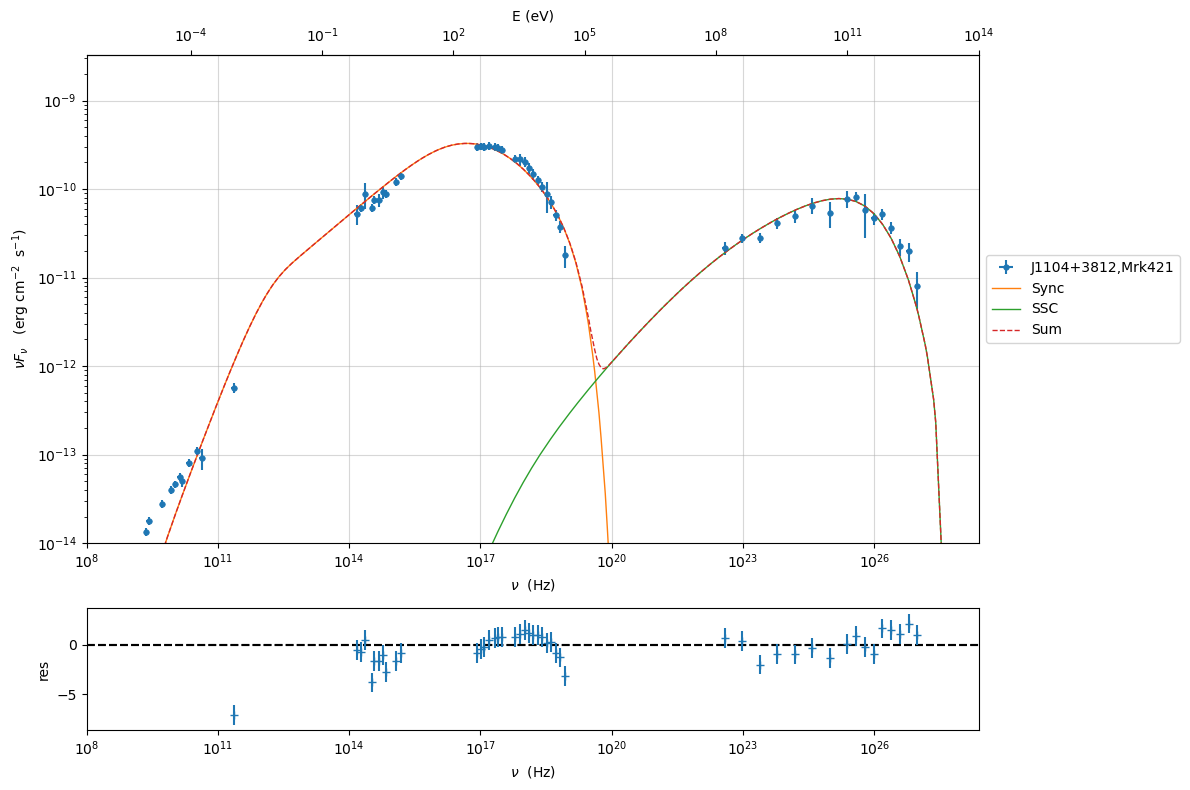

In [21]:
p=gammapy_jet_model.jetset_model.plot_model(sed_data=sed_data)
p.add_model_residual_plot(data=sed_data, model=jet,fit_range=[1E11,1E30])
p.setlim(x_min=1E8,y_min=1E-14)

### importing data to gammapy

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


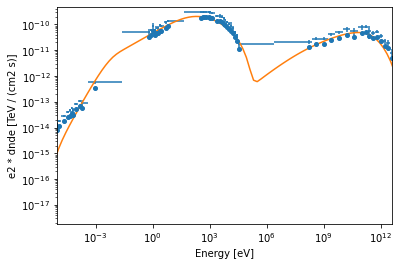

In [22]:
from gammapy.estimators import FluxPoints

fp=FluxPoints.from_table(sed_data.gammapy_table,sed_type='e2dnde')
p=fp.plot(sed_type='e2dnde')
p=gammapy_jet_model.plot(energy_bounds=[1E-18, 10] * u.TeV,energy_power=2)

plt.show()

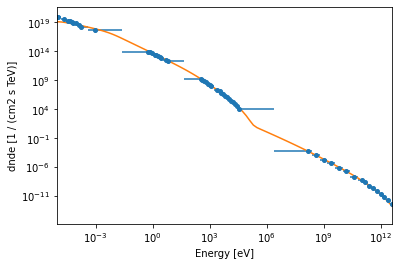

In [23]:
p=fp.plot(sed_type='dnde')
p=gammapy_jet_model.plot(energy_bounds=[1E-18, 10] * u.TeV,energy_power=0)

plt.show()

### building gammapy SkyModel

we build the SkyModel, and we degrade the pre-fit model quality

SkyModel

  Name                      : SSC model Mrk 421
  Datasets names            : None
  Spectral model type       : GammapyJetsetModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    gmin         (frozen)   :    469.754                   
    gmax                    : 1373159.756  +/-    0.00             
    N                       :      2.000   +/-    0.00 1 / cm3     
    gamma0_log_parab            :  33279.546   +/-    0.00             
    s                       :      2.163   +/-    0.00             
    r                       :      0.500   +/-    0.00             
    R            (frozen)   : 31058584282107640.000      cm          
    R_H          (frozen)   : 100000000000000000.000       cm          
    B                       :      0.051   +/-    0.00 gauss       
    beam_obj                :     20.000   +/-    0.00             
    z_cosm       (frozen)   :      0.031                   




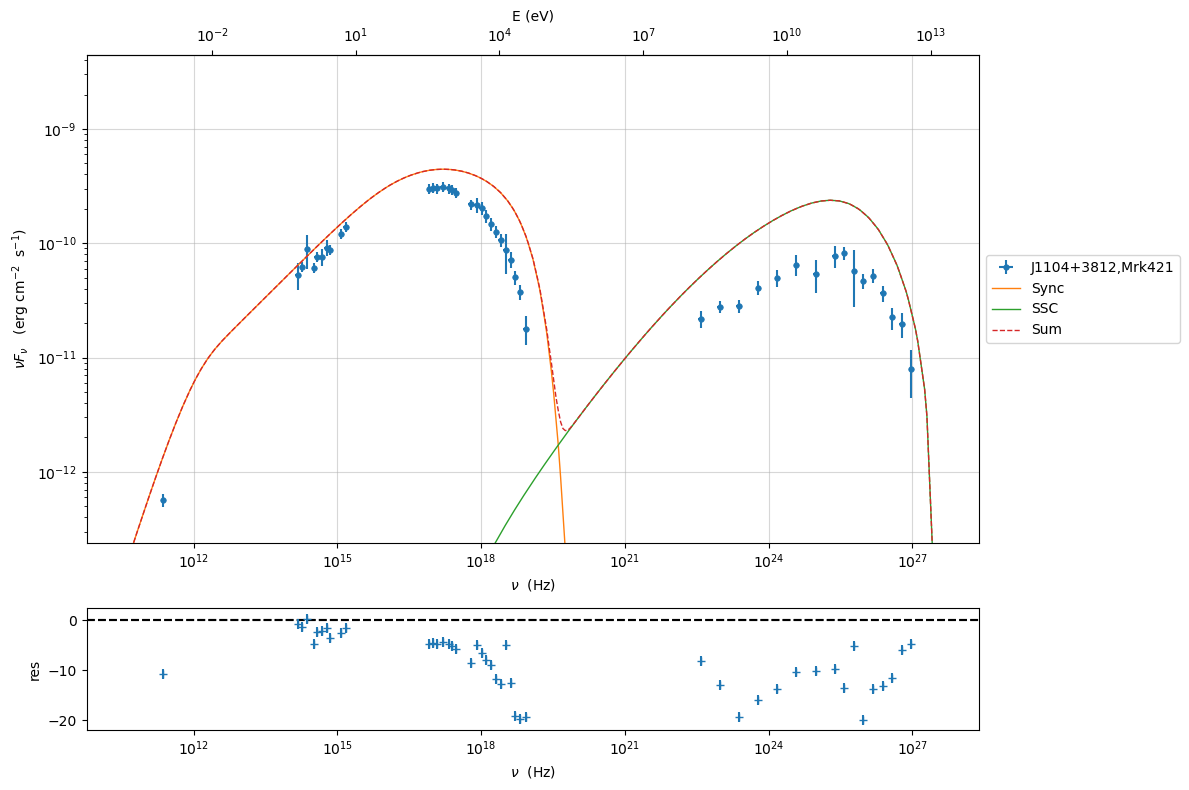

In [24]:
from gammapy.modeling.models import SkyModel
model = SkyModel(name="SSC model Mrk 421", spectral_model=gammapy_jet_model)
gammapy_jet_model.N.value=2
gammapy_jet_model.r.value=0.5
gammapy_jet_model.beam_obj.value=20

print(model)
gammapy_jet_model.evaluate()
p=gammapy_jet_model.jetset_model.plot_model(sed_data=sed_data)
p.add_model_residual_plot(data=sed_data, model=gammapy_jet_model.jetset_model,fit_range=[1E11,1E30])



### setting gammapy Datasets and Fit classes, and running the fit

In [27]:
from gammapy.datasets import FluxPointsDataset,Datasets
dataset_mrk421 = FluxPointsDataset(data=fp,models=model)
# do not use frequency point below 1e11 Hz, affected by non-blazar emission
E_min_fit = (1e11 * u.Hz).to("eV", equivalencies=u.spectral())
dataset_mrk421.mask_fit = dataset_mrk421.data.energy_ref > E_min_fit
datasets=Datasets([dataset_mrk421])


In [28]:
from gammapy.modeling import Fit

fitter = Fit(backend='minuit')


In [29]:
results = fitter.run(datasets=datasets)


In [30]:
print(results)
print(results.parameters.to_table())

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : False
	message    : Optimization failed. Estimated distance to minimum too large.
	nfev       : 1460
	total stat : 57.98

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : False
	message    : Optimization failed. Estimated distance to minimum too large.
	nfev       : 1460
	total stat : 57.98


  type         name         value    unit   error      min       max    frozen link
-------- ---------------- ---------- ---- --------- --------- --------- ------ ----
spectral             gmin 4.6975e+02      0.000e+00 1.000e+00 1.000e+09   True     
spectral             gmax 8.8519e+05      2.298e-01 1.000e+05 1.000e+07  False     
spectral                N 1.0987e+00 cm-3 1.902e-06 1.000e-03 3.000e+00  False     
spectral gamma0_log_parab 5.0485e+04      1.480e-06 1.000e+03 1.000e+05  False     
spectral                s 2.1768e+00      2.005e-07 1.000e+00 3.000e+00  False     
spectral               

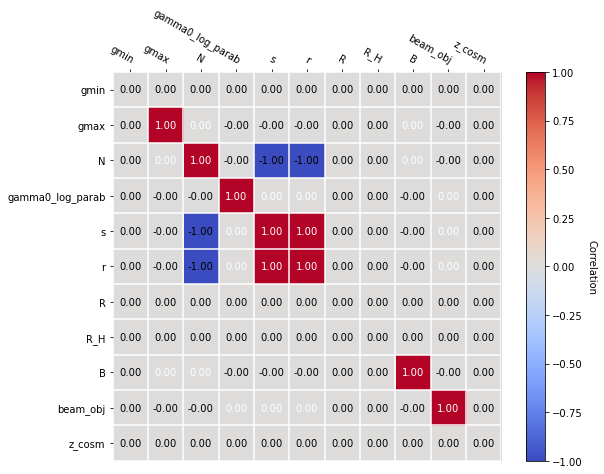

In [31]:
gammapy_jet_model.covariance.plot_correlation()
plt.show()

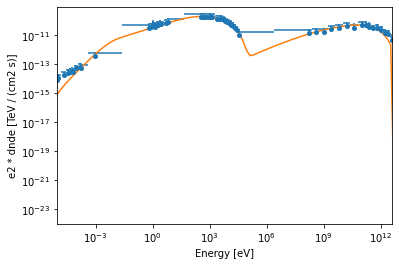

In [32]:
fp.plot(sed_type='e2dnde')
gammapy_jet_model.plot(energy_bounds=[1E-18, 10] * u.TeV,energy_power=2)
plt.show()

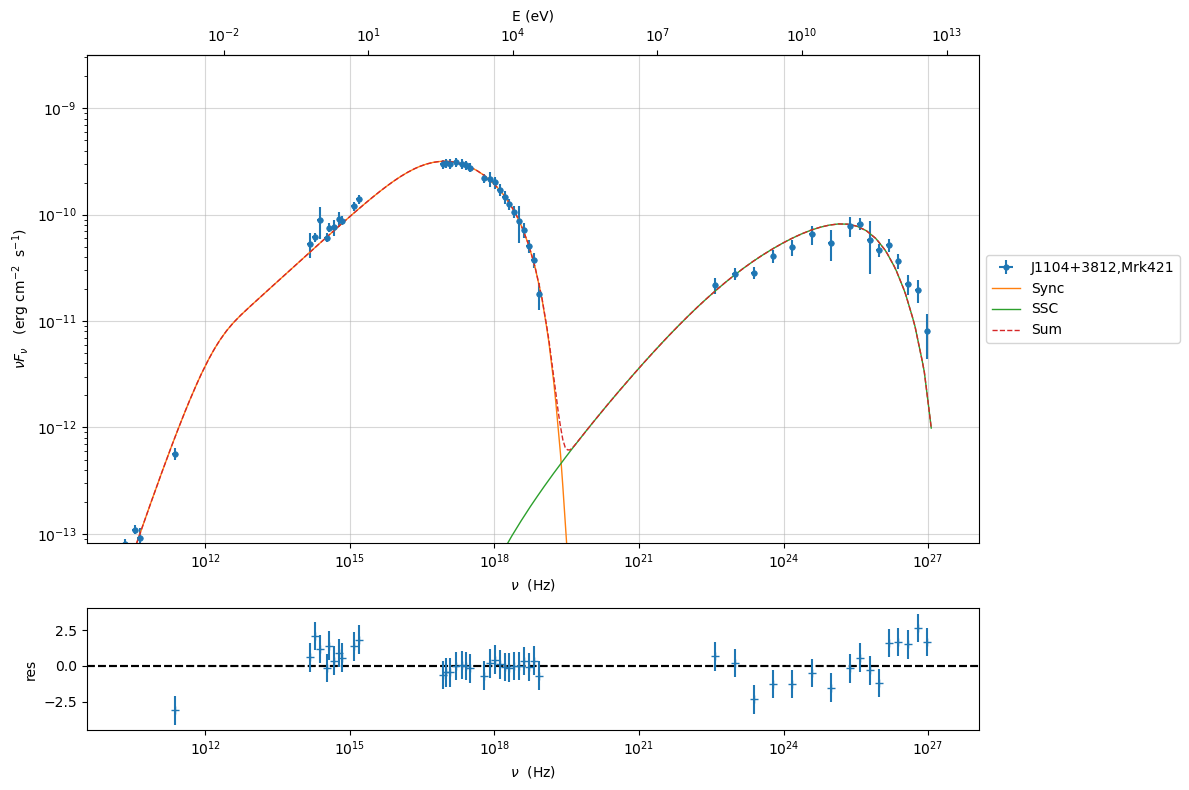

In [33]:
gammapy_jet_model.jetset_model.eval()
p=gammapy_jet_model.jetset_model.plot_model(sed_data=sed_data)
p.add_model_residual_plot(data=sed_data, model=gammapy_jet_model.jetset_model,
                                         fit_range=[1E11,1E30])
